# Данный файл содержит алгоритм предобработки Global DataFrame - датафрейма, необходимого для построения модели

Проанализируйте столбцы. Что в них содержится? Опишите переменные. Есть ли в данных пропуски? Обработайте пропуски. Если в какой-то колонке пропусков большинство, то ее можно удалить. Если их не очень много, можно заполнить их медианой/средним или чем-нибудь еще, напишите почему вы выбрали тот или иной вариант.

## Первичная очистка и объединение

In [6]:
import pandas as pd
import re
import numpy as np

In [7]:
df_items = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Nokia/Nokia%20Sales.tsv', delimiter = "\t")
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,$31.59,$5.00,34,"$1,074.14",https://www.ebay.com/itm/275016352540?nordt=tr...,"Jun 13, 2023"
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",$103.50,$0.00,4,$414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,"Jun 13, 2023"
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,$161.24,$0.00,8,"$1,289.92",https://www.ebay.com/itm/295688872962?nordt=tr...,"Jun 13, 2023"
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,$42.95,$5.50,26,"$1,116.79",https://www.ebay.com/itm/164928279178?nordt=tr...,"Jun 13, 2023"
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,$87.00,$8.22,1,$87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,"Jun 13, 2023"


In [8]:
df_items.dropna(subset=['Link'], inplace=True)
df_items.reset_index(inplace=True)
df_items.drop('index', axis=1, inplace = True)
df_items.isna().sum()

Title            0
Price            0
Shipping_cost    0
Sales_Count      0
Sales_Value      0
Link             0
Last_Sale        0
dtype: int64

In [9]:
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,$31.59,$5.00,34,"$1,074.14",https://www.ebay.com/itm/275016352540?nordt=tr...,"Jun 13, 2023"
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",$103.50,$0.00,4,$414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,"Jun 13, 2023"
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,$161.24,$0.00,8,"$1,289.92",https://www.ebay.com/itm/295688872962?nordt=tr...,"Jun 13, 2023"
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,$42.95,$5.50,26,"$1,116.79",https://www.ebay.com/itm/164928279178?nordt=tr...,"Jun 13, 2023"
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,$87.00,$8.22,1,$87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,"Jun 13, 2023"


In [10]:
def Sales_Value(value):
  pattern = r'\$|,'
  clean_value = re.sub(pattern, '', value)
  numeric_value = float(clean_value)
  return numeric_value


df_items.Price = df_items.Price.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Shipping_cost = df_items.Shipping_cost.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Sales_Value = df_items.Sales_Value.apply(lambda x: Sales_Value(x))

In [11]:
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,"Jun 13, 2023"
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,"Jun 13, 2023"
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,"Jun 13, 2023"
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,"Jun 13, 2023"
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,"Jun 13, 2023"


In [12]:
brands_list = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Motorola', 'Sony', 'LG', 'HTC', 'Nokia', 'BlackBerry', 'Lenovo', 'Asus', 'ZTE', 'Alcatel', 'Vivo', 'Realme', 'Honor']
brands_regex = re.compile('('+ '|'.join(brands_list) + ')', flags=re.IGNORECASE)

df_items['brand'] = df_items['Title'].str.extract(brands_regex)
df_items['brand'] = df_items['brand'].apply(lambda x: x.lower() if type(x) == str else x)
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,brand
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,"Jun 13, 2023",nokia
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,"Jun 13, 2023",nokia
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,"Jun 13, 2023",nokia
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,"Jun 13, 2023",nokia
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,"Jun 13, 2023",nokia


In [13]:
characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Nokia/Nokia%20Characteristics.tsv", delimiter = "\t")

C:\Users\druny\AppData\Local\Temp\ipykernel_29720\2203233837.py:1: DtypeWarning: Columns (31,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,74,75,76,77,87,88,89,90,96,97,98,99,100,101,102,111,112,113,114,115,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,149,150,151,154,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,186,187,188,189,190,191,192,193,195,196,197,198,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Nokia/Nokia%20Characteristics.tsv", delimiter = "\t")


In [18]:
cols = list(characteristics_df.count()[(characteristics_df.count()>(len(characteristics_df)*0.3))].index)
cols

['Link',
 'Condition',
 'Processor',
 'Screen Size',
 'Color',
 'Memory Card Type',
 'Lock Status',
 'SIM Card Slot',
 'Brand',
 'Network',
 'Model',
 'Connectivity',
 'Style',
 'Operating System',
 'Features',
 'Storage Capacity',
 'Camera Resolution',
 'RAM',
 'Seller Notes',
 'Contract',
 'MPN']

In [22]:
characteristics_df = characteristics_df[cols]

In [23]:
characteristics_df.isna().sum().sort_values()

Link                    0
Condition               9
Brand                  30
Storage Capacity      394
Model                 425
Color                 760
Network              1068
Screen Size          1658
Connectivity         1751
Camera Resolution    1816
Style                1838
Operating System     1953
Lock Status          2114
MPN                  2121
SIM Card Slot        2268
Seller Notes         2467
Features             2481
Memory Card Type     2610
RAM                  2676
Contract             2701
Processor            2786
dtype: int64

In [24]:
merged_df = df_items.merge(characteristics_df, on='Link', how='inner')

In [25]:
merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)

C:\Users\druny\AppData\Local\Temp\ipykernel_29720\2412579994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)


In [26]:
(~merged_df.isna()).sum()

Title                4731
Price                4731
Shipping_cost        4731
Sales_Count          4731
Sales_Value          4731
Link                 4731
Last_Sale            4731
brand                4688
Condition            4722
Processor            1945
Screen Size          3073
Color                3971
Memory Card Type     2119
Lock Status          2617
SIM Card Slot        2463
Brand                4731
Network              3663
Model                4306
Connectivity         2980
Style                2893
Operating System     2778
Features             2250
Storage Capacity     4337
Camera Resolution    2915
RAM                  2055
Seller Notes         2264
Contract             2030
MPN                  2610
dtype: int64

In [27]:
merged_df.iloc[182]

Title                Nokia 6300 4G Cell Phone - Cyan (Unlocked) (Du...
Price                                                            45.98
Shipping_cost                                                     11.1
Sales_Count                                                          1
Sales_Value                                                      45.98
Link                 https://www.ebay.com/itm/125970652334?nordt=tr...
Last_Sale                                                 Jun 10, 2023
brand                                                            nokia
Condition            Open box: An item in excellent, new condition ...
Processor                                                          NaN
Screen Size                                                     2.4 in
Color                                                             Blue
Memory Card Type                                             MicroSDHC
Lock Status                                                        NaN
SIM Ca

In [28]:
merged_df.drop('brand', axis=1, inplace = True)

In [31]:
merged_df.to_csv("Nokia Merged.tsv", sep="\t")

In [30]:
merged_df.shape

(4731, 27)

## Вторичная предобработка полученных с eBay данных

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Nokia/Nokia%20Merged.tsv', delimiter = '\t')

In [91]:
df.head()

,Unnamed: 0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,Processor,...,Connectivity,Style,Operating System,Features,Storage Capacity,Camera Resolution,RAM,Seller Notes,Contract,MPN
0,0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,"Jun 13, 2023",Used: An item that has been used previously. T...,Quad Core,...,"USB Type-C, 4G",Bar,Android,Fast Charging,32 GB,8.0 MP,2 GB,NaN,NaN,NaN
1,1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,"Jun 13, 2023",Open box,Dual Core,...,4G,Bar,Android,"Email, Web",64 GB,8.0 MP,4 GB,“The phone is in good condition. without earph...,Without Contract,Does Not Apply
2,2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,"Jun 13, 2023","New: A brand-new, unused, unopened, undamaged ...",Octa Core,...,5G,Bar,Android,"Fingerprint Sensor, Front Camera, Quad Rear Ca...",64 GB,12.0 MP,6 GB,NaN,Without Contract,NOKTA1257
3,3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,"Jun 13, 2023",Used,Single Core,...,"3G, Bluetooth",NaN,Android,Bluetooth Enabled,16 GB,12.0 MP,512 MB,"“1 year warranty, refurbished to a flawless ne...",Without Contract,NaN
4,4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,"Jun 13, 2023",Used,Octa Core,...,"USB Type-C, 5G, Bluetooth, Wi-Fi, GPS",Bar,Android,"Proximity Sensor, E-compass, Gyro Sensor, Acce...",128 GB,"5.0 MP, 48.0 MP, 2.0 MP",4 GB,“Excellent Condition.”,NaN,"F16BYA1022007, TA-1390"


In [92]:
df.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Shipping_cost', 'Sales_Count',
       'Sales_Value', 'Link', 'Last_Sale', 'Condition', 'Processor',
       'Screen Size', 'Color', 'Memory Card Type', 'Lock Status',
       'SIM Card Slot', 'Brand', 'Network', 'Model', 'Connectivity', 'Style',
       'Operating System', 'Features', 'Storage Capacity', 'Camera Resolution',
       'RAM', 'Seller Notes', 'Contract', 'MPN'],
      dtype='object')

In [93]:
df.drop(columns = 'Unnamed: 0', inplace = True)

<Axes: >

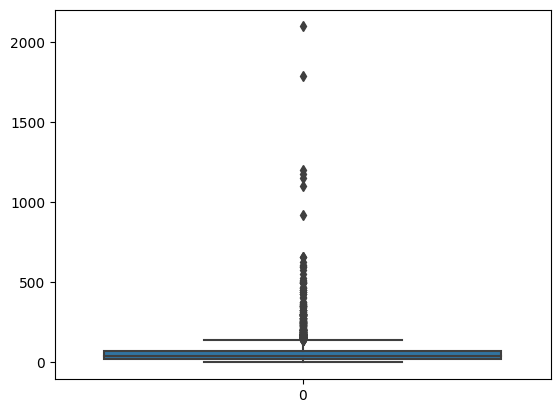

In [94]:
import seaborn as sns
sns.boxplot(df.Price)

## Ищем и убираем мусор.

In [95]:
import numpy as np
df[df.Price > np.quantile(df.Price, 0.99)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,Processor,Screen Size,...,Connectivity,Style,Operating System,Features,Storage Capacity,Camera Resolution,RAM,Seller Notes,Contract,MPN
42,Nokia X30 𝟱𝗚 𝑫𝒖𝒂𝒍 𝑺𝑰𝑴 TA-1450 Blue 8+256GB 📡𝐆𝐒...,463.99,0.00,1,463.99,https://www.ebay.com/itm/225533311171?nordt=tr...,"Jun 12, 2023","New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA-1450
93,Nokia N-Gage Game Deck (Unlocked) Smartphone (...,599.00,0.00,1,599.00,https://www.ebay.com/itm/225093413880?nordt=tr...,"Jun 12, 2023","Open box: An item in excellent, new condition ...",NaN,NaN,...,NaN,NaN,NaN,NaN,3.4 MB,NaN,NaN,NaN,NaN,"76854, 76858"
257,Nokia X30 TA-1450 256GB 8GB RAM Dual Sim (FACT...,495.99,27.82,16,7935.84,https://www.ebay.com/itm/225238522190?nordt=tr...,"Jun 9, 2023","New: A brand-new, unused, unopened, undamaged ...",Snapdragon 695,"6.43 """,...,NaN,NaN,Android,NaN,256 GB,50.0 Megapixel,8 GB,NaN,NaN,NaN
520,LOT OF 13 PARTS DEVICES STORE DEMOS PARTS APPL...,449.99,0.00,1,449.99,https://www.ebay.com/itm/125964687630?nordt=tr...,"Jun 5, 2023",For parts or not working,NaN,NaN,...,NaN,NaN,NaN,NaN,32 GB,NaN,NaN,“FOR PARTS ONLY SOLD AS NON WORKING DEVICES!”,NaN,NaN
843,"Nokia XR20 5G 6.67"" 128GB /6GB RAM 48MP IP68 M...",439.82,42.00,1,439.82,https://www.ebay.com/itm/224652995068?nordt=tr...,"May 31, 2023","New: A brand-new, unused, unopened, undamaged ...",Snapdragon 480,6.67in,...,5G,NaN,Android,Dual SIM,128 GB,48.0 MP,6 GB,NaN,Without Contract,Does Not Apply
857,Nokia X30 TA-1450 DS 256GB 8GB 5G Dual SIM (Gl...,449.99,0.00,1,449.99,https://www.ebay.com/itm/166127120729?nordt=tr...,"May 30, 2023",Open box,Octa Core,6.4 in,...,"USB Type-C, 5G, Bluetooth, 4G, 3G, Wi-Fi, 2G, ...",NaN,Android,"AMOLED Display, NFC Connectivity, Wi-Fi Capabl...",256 GB,"50.0 MP, 13.0 MP, 16.0 MP",8 GB,"“New, Open Box Condition.”",Without Contract,TA-1450
1165,"Nokia 8 Sirocco 128GB New 5,5"" 6GB RAM SS 32...",350.00,0.00,1,350.00,https://www.ebay.com/itm/225331262774?nordt=tr...,"May 25, 2023",Open box,NaN,5.5 in,...,NaN,NaN,NaN,NaN,128 GB,12.0 MP,6 GB,““New and unused just without the box. Deliver...,NaN,NaN
1332,"NOKIA 8.3 5G 6/64gb 8/128gb Octa-Core 6.81"" Fi...",424.99,0.00,1,424.99,https://www.ebay.com/itm/285251542690?nordt=tr...,"May 22, 2023","New: A brand-new, unused, unopened, undamaged ...",Octa Core,"6.81""",...,"2G, 3G, 4G, 5G",Bar,Android 12,"Bluetooth Enabled, Fingerprint Sensor, Battery...",NaN,64.0 MP,NaN,NaN,Without Contract,NaN
1366,Lot of 120 Untested Nokia Nokia 225 | GSM Unlo...,660.00,38.13,1,660.00,https://www.ebay.com/itm/354790195962?nordt=tr...,"May 21, 2023",For parts or not working,NaN,2.4 in,...,"Bluetooth, 4G, Micro USB",Bar,NaN,NaN,128 MB,0.3 MP,64 MB,“These Phones Are Warranty Returns From A Majo...,NaN,TA1282
1553,NOKIA 8800 ASTON MARTIN Rare Limited Good Co...,430.00,23.00,1,430.00,https://www.ebay.com/itm/394459205786?nordt=tr...,"May 17, 2023",Used: An item that has been used previously. T...,NaN,1.7 in,...,Micro USB,Slider,NaN,NaN,64 MB,NaN,NaN,NaN,NaN,"NOKIA8800SAPPHIREARTE, 11052, 11051, 641718203..."


In [96]:
df[df.Price < np.quantile(df.Price, 0.01)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,Processor,Screen Size,...,Connectivity,Style,Operating System,Features,Storage Capacity,Camera Resolution,RAM,Seller Notes,Contract,MPN
119,Lot of 3 Nokia Cell Phones -Black/Blue/White -...,2.25,10.95,1,2.25,https://www.ebay.com/itm/385660232777?nordt=tr...,"Jun 11, 2023",For parts or not working,NaN,NaN,...,4G,NaN,NaN,NaN,NaN,NaN,NaN,“These 3 phones have functional issues. NONE h...,NaN,NaN
519,Nokia Lumia 635 RM-975 - Black ( AT&T ) - For ...,3.00,5.99,1,3.00,https://www.ebay.com/itm/394528132570?nordt=tr...,"Jun 5, 2023",For parts or not working: An item that does no...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,Nokia Lumia 900 AT&T Blue Cell Phone BROKEN B0433,3.61,0.00,1,3.61,https://www.ebay.com/itm/125879700948?nordt=tr...,"Jun 5, 2023",For parts or not working,Single Core,4.3 in,...,NaN,Bar,NaN,NaN,16 GB,8.0 MP,NaN,“Device is in POOR used cosmetic condition. De...,NaN,"65375, LUMIA900ATT-CYAN, LUMIA900ATTCYAN"
546,Lot of 5 Nokia 225 4G Cell Phones - Black - NO...,0.99,14.99,1,0.99,https://www.ebay.com/itm/155578160765?nordt=tr...,"Jun 5, 2023",For parts or not working,NaN,NaN,...,4G,NaN,NaN,NaN,NaN,NaN,NaN,"“These 5 phones have issues. Several turn on,...",NaN,NaN
607,5x Job Lot Bundle Mobile Phones HTC Nokia Moto...,3.25,13.00,1,3.25,https://www.ebay.com/itm/285300934177?nordt=tr...,"Jun 4, 2023",Used,NaN,NaN,...,NaN,NaN,NaN,NaN,2 GB,NaN,NaN,“Used mobile phones. UNTESTED! Lot of 5x. Sell...,NaN,NaN
611,5x Job Lot Bundle Mobile Phones Nokia Motorola...,2.25,13.00,1,2.25,https://www.ebay.com/itm/285300606332?nordt=tr...,"Jun 4, 2023",Used,NaN,NaN,...,NaN,NaN,NaN,NaN,2 GB,NaN,NaN,“Used mobile phones. UNTESTED! Lot of 5x. Sell...,NaN,NaN
681,Nokia 5165 And 5160i - Cellular Phone Lot (4)....,1.25,12.45,1,1.25,https://www.ebay.com/itm/185914780448?nordt=tr...,"Jun 2, 2023",For parts or not working: An item that does no...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5165
880,Nokia Lumia 635 For Parts,2.00,4.99,1,2.00,https://www.ebay.com/itm/394433455667?nordt=tr...,"May 30, 2023",For parts or not working: An item that does no...,Quad Core,4.5 in,...,Micro USB,NaN,NaN,NaN,8 GB,5.0 MP,NaN,NaN,NaN,CPLS115
1442,Nokia 2600 PHONE FOR SPARES REPAIRS PARTS,1.00,9.50,1,1.00,https://www.ebay.com/itm/154596052666?nordt=tr...,"May 19, 2023",For parts or not working,NaN,NaN,...,NaN,NaN,NaN,NaN,1 MB,NaN,NaN,“PHONE FOR SPARES REPAIRS PARTS donor”,NaN,NaN
1455,JUNK LOT Of #3 Vintage Cellphones Nokia/Motoro...,0.99,10.00,1,0.99,https://www.ebay.com/itm/295695170802?nordt=tr...,"May 19, 2023",Used: An item that has been used previously. T...,NaN,NaN,...,NaN,NaN,NaN,NaN,32 GB,NaN,NaN,NaN,NaN,NaN


## Рассматриваем характеристики

### Состояние устройства

In [97]:
df.Condition.value_counts()

Used                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1398
Used: An item that has been used previously. The item may have some signs of cosmetic wear, but is ...Read moreabout the conditionUsed: An item that has been used previously. The item may have some signs of cosmetic wear, but is fully operational and functions as intended. This item may be a floor model or store return that has been used. See the seller’s listing for full details and description of any imperfections.See all condition definitionsopens 

In [98]:
df['Condition'] = df['Condition'].str.split(':', n=1).str[0]

In [99]:
df.Condition.value_counts()

Used                        2360
Open box                     881
New                          738
For parts or not working     702
Very Good - Refurbished       26
Good - Refurbished             8
Excellent - Refurbished        7
Name: Condition, dtype: int64

### Бренд

In [100]:
df.Brand.value_counts().index

Index(['Nokia', 'NOKIA', 'Samsung', 'Unbranded', 'Microsoft', 'T-Mobile',
       'Motorola', 'Verizon Wireless', 'Apple', 'TracFone', 'Total Wireless',
       'Tracfone', 'Nokia X100', 'LUNA', 'Nokia Microsoft', 'nokia',
       'Total By Verizon', 'LG, Nokia, Motorola', 'LG', 'Does not apply',
       'Sony Ericsson', 'Verizon', 'Google', 'HTC Nokia Motorola Microsoft',
       'TCL', 'Multiple', 'Simple Mobile', 'Nokiav', 'HTC Nokia Motorola',
       'Pantech', 'Samsung Galaxy LG HTC Nokia Motorola', 'sony', 'Unknown',
       'BlackBerry', 'Unbranded/Generic', 'Kyocera', 'Samsung LG ZTE Nokia',
       'Alcatel Avalon/Nokia 2V/LG K8+/Moto E4/ZTE ZFive C/Blu View 1', '210',
       'Nokia 3V', 'Sandata, LG, (V)ortex, Nokia, Apple', 'SANYO', 'unlock',
       'Straight Talk Wireless', 'Motorola, Nokia, Google, LG', 'Branded',
       'samsung, lg, nokia', 'Assorted', 'mix', 'NOKIA  G20',
       'Motorola / Nokia', 'Xiaomi', 'Nokia QD', 'Different',
       'Samsung, LG, &More', 'Porsche Design

In [101]:
df['Brand'] = df['Brand'].str.lower()

In [102]:
df.loc[(df['Brand'].str.lower().str.contains("nokia")), 'Brand'] = 'nokia'

In [103]:
df = df[df.Brand == 'nokia']

In [104]:
df.Brand.value_counts().index

Index(['nokia'], dtype='object')

### Модели смартфонов

In [105]:
df['Model'].value_counts().index

Index(['Nokia 6300 4G', 'Nokia 225 4G', 'Nokia G50', 'Nokia 3310', 'Nokia 100',
       'Nokia X100', 'Nokia G20', 'Nokia G10', 'Nokia C100', 'Nokia 2760',
       ...
       'Nokia E6-00', '6280', '3100', 'Nokia 3395', 'Nokia Lumia 510', '5170i',
       'Lumia 720', '108 (RM-945)', 'Nokia 2730c', 'Nokia G60'],
      dtype='object', length=970)

### Сети

In [106]:
df.Connectivity.value_counts()

Micro USB                                          416
2G                                                 290
4G                                                 155
Bluetooth, 4G, Wi-Fi, Micro USB                    115
USB Type-C, 5G, Bluetooth, Wi-Fi, GPS               86
                                                  ... 
5G, Bluetooth, GPS, Wi-Fi                            1
2G, 3G, 4G, Bluetooth, Micro USB, Wi-Fi              1
Quad-Band, Tri-Band, Dual-Band, LTE, 3G, 4G, 2G      1
Tri-Band                                             1
Bluetooth, Micro USB, 4G                             1
Name: Connectivity, Length: 298, dtype: int64

In [107]:
def clear(feat:str):
    if type(feat)==str:
        feat = re.split(r',\s*', feat)
        for i in range(len(feat)):
            feat[i] = feat[i].strip(" \'\'\"\"")
        feat = ', '.join(feat)
    return feat

In [108]:
Connectivity = df['Connectivity'].str.strip(" []").apply(clear)

In [109]:
Connectivity.value_counts()

Micro USB                                          416
2G                                                 290
4G                                                 155
Bluetooth, 4G, Wi-Fi, Micro USB                    115
USB Type-C, 5G, Bluetooth, Wi-Fi, GPS               87
                                                  ... 
5G, Bluetooth, GPS, Wi-Fi                            1
2G, 3G, 4G, Bluetooth, Micro USB, Wi-Fi              1
Quad-Band, Tri-Band, Dual-Band, LTE, 3G, 4G, 2G      1
Tri-Band                                             1
Bluetooth, Micro USB, 4G                             1
Name: Connectivity, Length: 292, dtype: int64

In [110]:
Connectivity = Connectivity.str.get_dummies(', ')

In [111]:
Connectivity

,2G,3.5 mm earjack,3G,4,4G,4G Bluetooth GPS LTE,4G LTE,4G LTE 5G WiFi Bluetooth,4G VOLTE,4G+,...,WAP,WCDMA,Wi-Fi,WiFi,microUSB,microUSB 1.1 (charging only),microUSB 2.0,microUSB 2.0 (charging only),microUSB v2.0,v2.0 microUSB
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4728,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
Connectivity.columns

Index(['2G', '3.5 mm earjack', '3G', '4', '4G', '4G Bluetooth GPS LTE',
       '4G LTE', '4G LTE 5G WiFi Bluetooth', '4G VOLTE', '4G+', '5G',
       '850/1900', 'Bluetooth', 'Bluetooth 4.1', 'Bluetooth 5.0',
       'Bluetooth: 5.0', 'Bluetooth:5.0', 'DLNA', 'Dual-Band', 'EDGE', 'Email',
       'FM Radio', 'FM radio', 'GPRS', 'GPS', 'GSM 900 / 1800',
       'Google Assistant Button', 'HDMI Micro', 'Headphone Jack', 'Infrared',
       'LTE', 'Lightning', 'MMS', 'Micro USB', 'Micro USB 2.0', 'Micro-USB',
       'Mini USB', 'NFC', 'No', 'Nokia 216', 'Quad-Band', 'SMS', 'Tri-Band',
       'USB', 'USB 2.0', 'USB Type-C', 'USB connection: Micro USB (USB 2.0)',
       'USB microUSB 2.0', 'VOLTE', 'WAP', 'WCDMA', 'Wi-Fi', 'WiFi',
       'microUSB', 'microUSB 1.1 (charging only)', 'microUSB 2.0',
       'microUSB 2.0 (charging only)', 'microUSB v2.0', 'v2.0 microUSB'],
      dtype='object')

In [113]:
Connectivity['Headphone Jack'] = Connectivity['Headphone Jack'] + Connectivity['3.5 mm earjack']

Connectivity['4G'] = Connectivity['4G'] + Connectivity['4G Bluetooth GPS LTE'] + Connectivity['4G LTE'] + Connectivity['4G+'] + Connectivity['LTE'] + Connectivity['4G LTE 5G WiFi Bluetooth'] + Connectivity['4G VOLTE'] + Connectivity['LTE'] + Connectivity['VOLTE']

Connectivity['5G'] = Connectivity['5G'] + Connectivity['4G LTE 5G WiFi Bluetooth']

Connectivity['Bluetooth'] = Connectivity['Bluetooth'] + Connectivity['4G Bluetooth GPS LTE'] + Connectivity['4G LTE 5G WiFi Bluetooth'] + Connectivity['Bluetooth 4.1'] + Connectivity['Bluetooth 5.0'] + Connectivity['Bluetooth: 5.0'] + Connectivity['Bluetooth:5.0']

Connectivity['FM'] =Connectivity['FM Radio'] + Connectivity['FM radio'] + Connectivity['Bluetooth 4.1']

Connectivity['GPS'] = Connectivity['GPS'] + Connectivity['GPRS']

Connectivity['GSM'] = Connectivity['GSM 900 / 1800']

Connectivity['Micro USB'] = Connectivity['Micro USB'] + Connectivity['Micro USB 2.0'] + Connectivity['Micro-USB'] + Connectivity['Mini USB'] + Connectivity['USB connection: Micro USB (USB 2.0)'] + Connectivity['USB microUSB 2.0'] + Connectivity['microUSB'] + Connectivity['microUSB 1.1 (charging only)'] + Connectivity['microUSB 2.0'] + Connectivity['microUSB 2.0 (charging only)'] + Connectivity['microUSB v2.0'] + Connectivity['v2.0 microUSB']

Connectivity['Type-C'] = Connectivity['USB Type-C']

Connectivity['WI-FI'] =  + Connectivity['Wi-Fi'] + Connectivity['WiFi']

Connectivity['USB'] = Connectivity['USB'] + Connectivity['USB 2.0']

In [114]:
Reasonable = Connectivity[['2G', '3G', '4G', '5G', 'Bluetooth', 'GSM', 'WI-FI', 'Micro USB', 'USB', 'Type-C', 'NFC', 'Dual-Band', 'FM', 'DLNA', 'EDGE', 'GPS', 'HDMI Micro', 'Headphone Jack', 'Infrared', 'Lightning', 'Quad-Band', 'Tri-Band', 'WAP', 'WCDMA']]

In [115]:
Reasonable.loc[Reasonable.values > 1] = 1

C:\Users\druny\AppData\Local\Temp\ipykernel_29720\76639661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reasonable.loc[Reasonable.values > 1] = 1


In [116]:
(Reasonable.values > 1).sum()

0

In [117]:
Reasonable.sum()

2G                1107
3G                 736
4G                 987
5G                 636
Bluetooth         1491
GSM                277
WI-FI             1048
Micro USB         1129
USB                289
Type-C             713
NFC                455
Dual-Band          309
FM                 278
DLNA               277
EDGE               279
GPS                662
HDMI Micro         277
Headphone Jack     306
Infrared           300
Lightning          277
Quad-Band          305
Tri-Band           329
WAP                278
WCDMA              276
dtype: int64

### Объём памяти

In [118]:
df['Storage Capacity'].value_counts()
#убираем везде гиги за шаги а дальше развлекаемся

32 GB     456
128 GB    429
4 GB      260
512 MB    259
128 MB    242
         ... 
2gb         1
.13GB       1
46          1
TESTE       1
38 MB       1
Name: Storage Capacity, Length: 237, dtype: int64

In [119]:
df['Storage Capacity'] = df['Storage Capacity'].str.extract(r'(\d+)')
df['Storage Capacity'] = pd.to_numeric(df['Storage Capacity'])

In [120]:
df.loc[df['Storage Capacity'] > 512, 'Storage Capacity'] = 32

In [121]:
df['Storage Capacity'].value_counts()

128.0    732
32.0     603
4.0      396
64.0     346
512.0    303
        ... 
56.0       1
350.0      1
280.0      1
90.0       1
38.0       1
Name: Storage Capacity, Length: 73, dtype: int64

###  Связь

In [122]:
#тут есть операторские и не операторские телефоны. сразу разделим их и не будем работать с конкретными операторами
df['Network'].value_counts()

Unlocked                           2443
AT&T                                161
Verizon                             151
T-Mobile                            146
TracFone                            101
                                   ... 
Tesco Mobile                          1
TracFone, Walmart Family Mobile       1
T-Mobile, NA                          1
usacell                               1
GSM 4G, Unlocked                      1
Name: Network, Length: 156, dtype: int64

In [123]:
df.loc[(df['Network'].str.lower().str.contains("unlocked")!=True), 'Network'] = 'Operator'
df.loc[(df['Network'].str.lower().str.contains("unlocked")), 'Network'] = 'Unlocked'

In [124]:
df['Network'].value_counts()

Unlocked    2642
Operator    1825
Name: Network, dtype: int64

### Камеры

In [125]:
#в камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда :D
df['Camera Resolution'].value_counts()

2.0 MP                       525
0.3 MP                       338
5.0 MP                       288
48.0 MP                      171
8.0 MP                       168
                            ... 
12.0 MP, 13.0 MP, 16.0 MP      1
8.0 MP + 2.0 MP                1
20 MP                          1
16 MP + 5 MP + 2 MP            1
48MP                           1
Name: Camera Resolution, Length: 130, dtype: int64

In [126]:
df['Camera Resolution'] = df['Camera Resolution'].str.extract(r'(\d+)')
df['Camera Resolution'] = pd.to_numeric(df['Camera Resolution'])

In [127]:
#в камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда :D
df['Camera Resolution'].value_counts()

2.0     626
5.0     511
0.0     380
8.0     263
48.0    203
3.0     165
13.0    135
1.0      94
16.0     71
12.0     68
20.0     38
41.0     33
64.0     19
50.0     15
10.0      9
6.0       5
Name: Camera Resolution, dtype: int64

In [128]:
df.loc[df['Camera Resolution'] > 100, 'Camera Resolution'] = 32

In [129]:
df['Camera Resolution'].value_counts()

2.0     626
5.0     511
0.0     380
8.0     263
48.0    203
3.0     165
13.0    135
1.0      94
16.0     71
12.0     68
20.0     38
41.0     33
64.0     19
50.0     15
10.0      9
6.0       5
Name: Camera Resolution, dtype: int64

### Разрешение экрана

In [130]:
#все одно и то же, достаем оттуда все-все-все
df['Screen Size'].value_counts()

2.4 in        510
6.5 in        215
2.5 in        196
2.8 in        123
2 in          106
             ... 
4.1 in          1
1.8in           1
2.40            1
2.6 inches      1
6.58in          1
Name: Screen Size, Length: 199, dtype: int64

In [131]:
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.\d+)')
df['Screen Size'] = pd.to_numeric(df['Screen Size'])

In [132]:
df['Screen Size'].value_counts()

2.40    603
6.50    222
2.50    196
2.80    151
1.80    142
       ... 
7.00      1
1.45      1
1.54      1
1.43      1
5.65      1
Name: Screen Size, Length: 75, dtype: int64

### Оперативная память

In [133]:
#все то же самое с оперативкой
df['RAM'].value_counts()

4 GB      359
512 MB    227
6 GB      219
2 GB      212
64 MB     150
         ... 
768 MB      1
725KB       1
8MB         1
≤512M       1
45 MB       1
Name: RAM, Length: 99, dtype: int64

In [134]:
df['RAM'] = df['RAM'].str.extract(r'(\d+)')
df['RAM'] = pd.to_numeric(df['RAM'])

In [135]:
#все то же самое с оперативкой
df['RAM'].value_counts()

4.0      377
512.0    261
2.0      237
6.0      225
1.0      193
64.0     183
128.0    175
3.0      119
8.0       30
256.0     26
0.0       23
32.0      19
16.0      16
48.0      10
258.0      7
30.0       4
96.0       3
70.0       3
100.0      3
170.0      2
384.0      2
5.0        2
90.0       1
81.0       1
60.0       1
768.0      1
725.0      1
80.0       1
20.0       1
45.0       1
Name: RAM, dtype: int64

In [136]:
df.loc[df['RAM'] > 16, 'RAM'] = 8

In [137]:
df['RAM'].value_counts()

8.0     736
4.0     377
2.0     237
6.0     225
1.0     193
3.0     119
0.0      23
16.0     16
5.0       2
Name: RAM, dtype: int64

### Contract

In [138]:
df.Contract.value_counts()

Without Contract            1760
Prepaid                      132
With Contract                 16
Untested                       6
With or without contract       4
                              1
untested                       1
Name: Contract, dtype: int64

### Операционная система

In [139]:
df['Operating System'].value_counts()

Android                 1002
Symbian                  657
KaiOS                    266
Feature Phone             84
S30+                      84
                        ... 
Windows Phone 7.8          1
Android™ 12                1
Maemo                      1
Android (Go edition)       1
Microsoft WIndows          1
Name: Operating System, Length: 100, dtype: int64

In [140]:
df['Operating System'] = df['Operating System'].str.replace(r'Android\b.*', 'Android')

C:\Users\druny\AppData\Local\Temp\ipykernel_29720\1654794335.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Operating System'] = df['Operating System'].str.replace(r'Android\b.*', 'Android')


In [141]:
df.loc[(df['Operating System'] == 'iOS') | (df['Operating System'] == 'IOS') | (df['Operating System'] == 'iOS - Apple'), 'Operating System'] = 'IOS'

In [142]:
df.loc[(df['Operating System'] != 'IOS') & (df['Operating System'] != 'Android'), 'Operating System'] = 'Other'

In [143]:
df['Operating System'].value_counts()

Other      3423
Android    1019
IOS          25
Name: Operating System, dtype: int64

### Форм-Фактор

In [144]:
df['Style'].value_counts() #юслесс

Bar                 2312
Flip                 205
Slider               184
Smartphone            16
Slate                  9
Touch Screen           7
Touchscreen            7
Foldable               4
Swivel                 4
Slide                  4
Mobile Phone           3
smartphone             1
rugged                 1
Variety                1
QWERTY                 1
Solid                  1
Nokia 2220 slide       1
Clamshell              1
Candy Bar              1
Classic                1
Name: Style, dtype: int64

### Фичи

In [145]:
df['Features'].value_counts() #юзлесс

Internet Connectivity                                                                                                                             117
Camera                                                                                                                                             94
Proximity Sensor, E-compass, Gyro Sensor, Accelerometer, Ambient Light Sensor, Ultra Wide-Angle Camera, Fingerprint Sensor, Triple Rear Camera     71
Facial Recognition, Fingerprint Sensor, Fast Charging                                                                                              37
Proximity Sensor, Accelerometer, High Capacity Battery (5000 mAh or More)                                                                          37
                                                                                                                                                 ... 
Calendar, Text Messaging, Internet Browser, Bluetooth Enabled, Color Screen, Email Access, Speakerph

In [146]:
def clear(feat:str):
    if type(feat)==str:
        feat = re.split(r',\s*', feat)
        for i in range(len(feat)):
            feat[i] = feat[i].strip(" \'\'\"\"")
        feat = ', '.join(feat)
    return feat

In [147]:
Features = df['Features'].str.strip(" []").apply(clear)

In [148]:
Features.value_counts()

Internet Connectivity                                                                                                                             117
Camera                                                                                                                                             94
Proximity Sensor, E-compass, Gyro Sensor, Accelerometer, Ambient Light Sensor, Ultra Wide-Angle Camera, Fingerprint Sensor, Triple Rear Camera     71
Facial Recognition, Fingerprint Sensor, Fast Charging                                                                                              37
Proximity Sensor, Accelerometer, High Capacity Battery (5000 mAh or More)                                                                          37
                                                                                                                                                 ... 
Accelerometer, SMS, MMS, Email, IM                                                                  

In [149]:
Features = Features.str.get_dummies(', ')

In [150]:
Features.sum().nlargest(100)  #выглядит юслесс и дубликатом

Bluetooth Enabled     815
Camera                602
Music Player          489
Wi-Fi Capable         419
Accelerometer         412
                     ... 
Java                    6
Night Mode              6
OLED Display            6
SNS applications        6
Speech Recognition      6
Length: 100, dtype: int64

In [151]:
Features.columns

Index(['1 SIM Card', '1.77'' external screen', '1150 mAh1', '128 MB + 64 MB',
       '13Mp Front Camera', '2.4” QVGA', '2.8'' internal screen', '2G',
       '2G NOKIA Phone', '2MP Camera with Flash',
       ...
       'recording (selected markets)', 'removable (Charging:AC-18)', 'sms',
       'tou', 'up to 32 GB MicroSD', 'upgradable to Android 9', 'video light',
       'wi-fi', 'wireless charger', 'xHTML'],
      dtype='object', length=394)

### SIM-слот

In [152]:
df['SIM Card Slot'].value_counts() #норм

Single SIM                             1696
Dual SIM (SIM + SIM)                    362
Dual SIM (SIM + SIM + Memory Card)      158
Dual SIM (SIM + SIM/Memory Card)         84
Dual SIM                                 35
Dual SIM (SIM + eSIM)                     8
Single                                    3
eSIM                                      2
One                                       1
Single SIM - Standard SiM card size       1
One Or two                                1
Name: SIM Card Slot, dtype: int64

### Карта памяти

In [153]:
#выглядит юзлесс
df['Memory Card Type'].value_counts()

MicroSD                                       839
microSDXC                                     476
MicroSDHC                                     372
no                                             62
MultiMediaCard (MMC)                           38
microSDHC (dedicated slot)                     28
microSDHC                                      28
MicroSD, MicroSDHC                             23
Not Applicable                                 23
microSD                                        18
No                                             15
Micro SD                                       13
eMMC                                           12
NO                                              9
microSDXC (uses shared SIM slot)                8
None                                            8
MiniSD                                          8
CompactFlash                                    6
microSD, up to 8GB                              5
RS-MMC                                          5


### Процессор

In [154]:
df['Processor'].value_counts()

Octa Core                633
Single Core              574
Quad Core                296
Dual Core                134
Qual Comm                 48
                        ... 
mix                        1
104 MHz ARM 9              1
Unisoc USM9117             1
unknown                    1
Unisoc SC9863A (28nm)      1
Name: Processor, Length: 68, dtype: int64

In [155]:
def unify_processor(processor):
    if type(processor)==str:
        processor = processor.lower()
        if 'octa' in processor or '8 core' in processor or '8-core' in processor:
            return 'Octa Core'
        elif 'hexa' in processor or '6 core' in processor or '6-core' in processor:
            return 'Hexa Core'
        elif 'quad' in processor or '4 core' in processor or '4-core' in processor:
            return 'Quad Core'
        elif 'dual' in processor or '2 core' in processor or '2-core' in processor:
            return 'Dual Core'
        else:
            return 'Others'
    else:
        return 'Others'

# Применение функции унификации к столбцу "Processor"
df['Processor'] = df['Processor'].apply(unify_processor)

df['Processor'].value_counts()

Others       3364
Octa Core     637
Quad Core     311
Dual Core     154
Hexa Core       1
Name: Processor, dtype: int64

### Объединяем всё вместе

In [156]:
data = pd.concat([df, Reasonable], axis = 1)

In [157]:
data.columns

Index(['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link',
       'Last_Sale', 'Condition', 'Processor', 'Screen Size', 'Color',
       'Memory Card Type', 'Lock Status', 'SIM Card Slot', 'Brand', 'Network',
       'Model', 'Connectivity', 'Style', 'Operating System', 'Features',
       'Storage Capacity', 'Camera Resolution', 'RAM', 'Seller Notes',
       'Contract', 'MPN', '2G', '3G', '4G', '5G', 'Bluetooth', 'GSM', 'WI-FI',
       'Micro USB', 'USB', 'Type-C', 'NFC', 'Dual-Band', 'FM', 'DLNA', 'EDGE',
       'GPS', 'HDMI Micro', 'Headphone Jack', 'Infrared', 'Lightning',
       'Quad-Band', 'Tri-Band', 'WAP', 'WCDMA'],
      dtype='object')

In [158]:
data.isna().sum()

Title                   0
Price                   0
Shipping_cost           0
Sales_Count             0
Sales_Value             0
Link                    0
Last_Sale               0
Condition               9
Processor               0
Screen Size          1868
Color                 736
Memory Card Type     2420
Lock Status          1975
SIM Card Slot        2116
Brand                   0
Network                 0
Model                 380
Connectivity         1621
Style                1703
Operating System        0
Features             2289
Storage Capacity      509
Camera Resolution    1832
RAM                  2539
Seller Notes         2277
Contract             2547
MPN                  1946
2G                      0
3G                      0
4G                      0
5G                      0
Bluetooth               0
GSM                     0
WI-FI                   0
Micro USB               0
USB                     0
Type-C                  0
NFC                     0
Dual-Band   

In [159]:
#чистим наны
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [160]:
data.isna().sum()

Title                0
Price                0
Shipping_cost        0
Sales_Count          0
Sales_Value          0
Link                 0
Last_Sale            0
Condition            0
Processor            0
Screen Size          0
Color                0
Memory Card Type     0
Lock Status          0
SIM Card Slot        0
Brand                0
Network              0
Model                0
Connectivity         0
Style                0
Operating System     0
Features             0
Storage Capacity     0
Camera Resolution    0
RAM                  0
Seller Notes         0
Contract             0
MPN                  0
2G                   0
3G                   0
4G                   0
5G                   0
Bluetooth            0
GSM                  0
WI-FI                0
Micro USB            0
USB                  0
Type-C               0
NFC                  0
Dual-Band            0
FM                   0
DLNA                 0
EDGE                 0
GPS                  0
HDMI Micro 

In [164]:
data["Last_Sale"] = pd.to_datetime(data["Last_Sale"])

In [165]:
data.to_csv('Nokia preprocessed.tsv', index = False, sep = '\t')